This notebook will calculate the width of fish flesh and swimbladder given a length based on measurements made by Chu 2003

In [1]:
import os
import numpy as np
import pandas as pd
from scipy import optimize
from scipy import linalg
from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import array as arr
import seaborn as sns

In [2]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

# Data from Chu 2003 length/width 
Data does not increase linearly with time. That is ok. I am more looking total length to total width and total swimbladder length to swimbladder width ratios. These values give a bit of a spread and an idea. Assume length and width and linearly correlated

In [3]:
days = np.array([5, 8, 36, 16, 22, 30])
L_t = np.array([5.1, 5.45,  6.99, 7.04, 8.64, 10.94])
V_t = np.array([0.37, 0.27, 1.99, 0.63, 3.22,  4.34])
W_t = 2*np.sqrt(3*V_t/(2*np.pi*L_t))
L_swim = np.array([0.2, 0.26, 0.47, 0.39, 0.65,  0.85])
V_swim = np.array([0.004,0.009,0.035,0.031,0.042,0.063])
W_swim = 2*np.sqrt(3*V_swim/(2*np.pi*L_swim))

Text(0.5, 1.0, 'Total fish size for cod larvae')

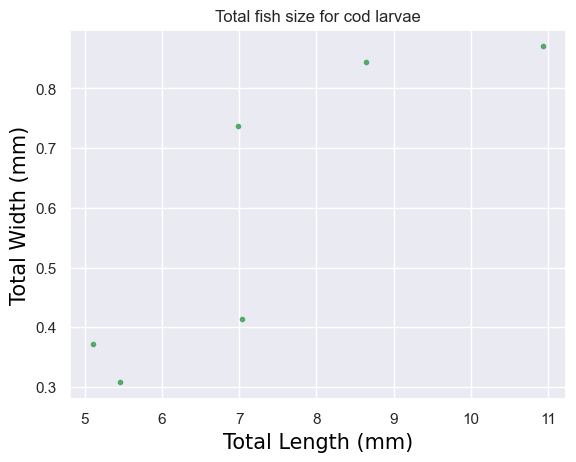

In [4]:
plt.plot(L_t,W_t, '.g')
plt.ylabel('Total Width (mm)', axis_font)
plt.xlabel('Total Length (mm)', axis_font)
plt.title("Total fish size for cod larvae")

Text(0, 0.5, 'Swimbladder Width (mm)')

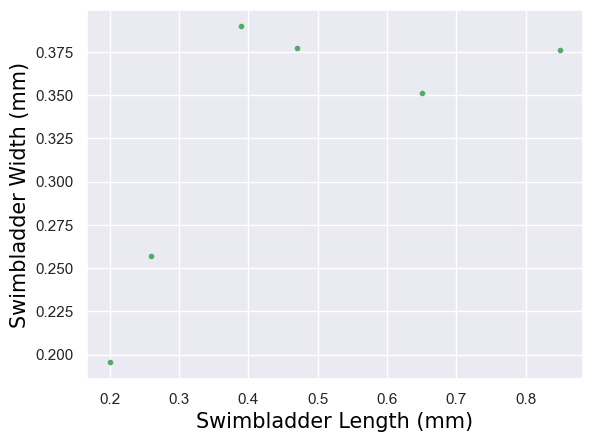

In [5]:
plt.plot(L_swim, W_swim, '.g')
plt.xlabel('Swimbladder Length (mm)', axis_font)
plt.ylabel('Swimbladder Width (mm)', axis_font)

# Measurements


In [19]:
L = np.array([227,187,168,181,174,174,203,196,206,207,187,190,148,230,199,175,208,194,200,165,180,166,169,176,199,193,178,268,154,182,226,176,177,159,195,175,189,197,180,181,170,210,241,223,194,199,176,183,173,221,150,201,180,184,181,183,186,153,154,222,176,186,174,167,166,188,172,176,144,159,177,149,143,176,208,194,198,172,170,192,199,151,222,138,150,182,187,142,121,126])

In [20]:
len(L)

90

## Interpolate to calculate width
I assume the length to width ratio is linear.
Calculate the total width of each fish based on the measured lengths (R4)

In [21]:
f = UnivariateSpline(L_t,W_t, k=1)
W_calc = f(L)

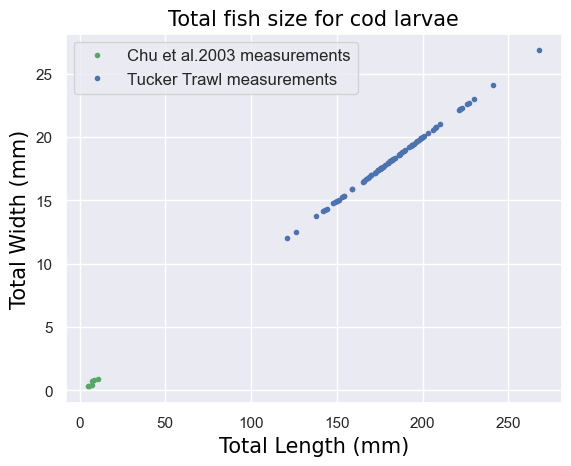

In [22]:
plt.plot(L_t,W_t, '.g', label='Chu et al.2003 measurements')
plt.plot(L, W_calc, '.', label='Tucker Trawl measurements')
plt.ylabel('Total Width (mm)', axis_font)
plt.xlabel('Total Length (mm)', axis_font)
plt.title("Total fish size for cod larvae", title_font)
plt.legend(fontsize=12);


In [23]:
modelLW = LinearRegression().fit(W_t.reshape(-1, 1),L_t.reshape(-1, 1))
r_sqLW = modelLW.score(W_t.reshape(-1, 1),L_t.reshape(-1, 1))
print("Intercept:", modelLW.intercept_)
print("Slope:", modelLW.coef_)
print("R_sq:", r_sqLW)

Intercept: [3.04027818]
Slope: [[7.31180043]]
R_sq: 0.7365407936176698


# Interpolate to calculate length of swimbladder given length of fish
To calculate the length of swimbladder associate with the total measured length (R3), I interpolate the relationship from measurement by Chu 2003. Again I assume the total length to swimbladder length relationship is linear

In [24]:
f = UnivariateSpline(L_t,L_swim, k=1)
L_swim_calc = f(L)

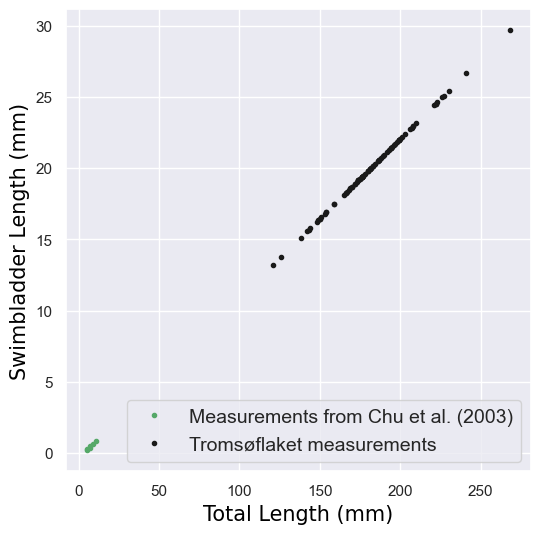

In [26]:
fig = plt.figure(figsize=(6,6))
plt.plot(L_t,L_swim, '.g', label='Measurements from Chu et al. (2003)')
plt.plot(L, L_swim_calc, '.k', label='Tromsøflaket measurements')
plt.xlabel('Total Length (mm)', axis_font)
plt.ylabel('Swimbladder Length (mm)', axis_font)
#plt.title("Swimbladder size from total length", title_font)
plt.legend(fontsize=14)
fig.savefig('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/CJFAS_manuscript/Figs/FigureS1.jpg', format='jpg', dpi = 300, facecolor='w', bbox_inches='tight')

## Fit for linear regression for equation from total length to swimbladder length

In [27]:
model = LinearRegression().fit(L_swim.reshape(-1, 1),L_t.reshape(-1, 1))
r_sq = model.score(L_swim.reshape(-1, 1),L_t.reshape(-1, 1))
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)
print("R_sq:", r_sq)

Intercept: [3.24601266]
Slope: [[8.75316456]]
R_sq: 0.9808480458822298


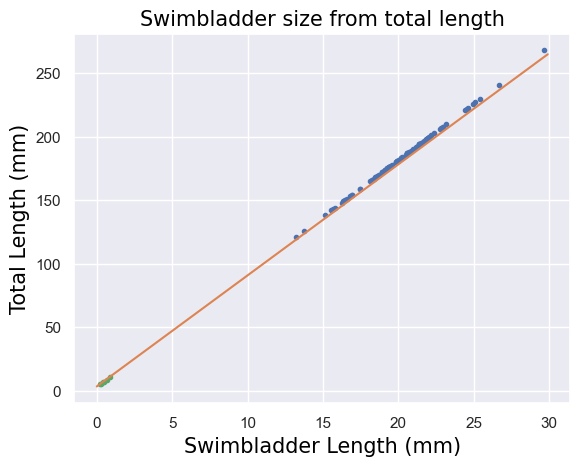

In [30]:
plt.plot(L_swim,L_t, '.g')
plt.plot(L_swim_calc, L, '.')
plt.ylabel('Total Length (mm)', axis_font)
plt.xlabel('Swimbladder Length (mm)', axis_font)
plt.title("Swimbladder size from total length", title_font)

# plot slope
x = np.arange(0,30,0.1)
y = model.coef_[0]*x + model.intercept_[0]
plt.plot(x,y, '-')

# Swimbladder width
Again I assume linearity in the swimbladder length to width ratio and calculate the width of swimbladder based on calculated swimbladder lengths

In [ ]:
#reorder swimbladder size
L_swim = np.array([0.2, 0.26, 0.39,  0.47, 0.65,  0.85])
V_swim = np.array([0.004,0.009,0.031, 0.035, 0.042,0.063])
W_swim = 2*np.sqrt(3*V_swim/(2*np.pi*L_swim))

In [ ]:
f = UnivariateSpline(L_swim,W_swim, k=1)
W_swim_calc = f(L_swim_calc)

In [ ]:
plt.plot(L_swim,W_swim, '.g')
plt.plot(L_swim_calc, W_swim_calc, '.')
plt.xlabel('Swimbladder Length (mm)', axis_font)
plt.ylabel('Swimbladder Width (mm)', axis_font)
plt.title("Swimbladder size", title_font)

# Combine results
Now I can summarize the minimum (width) and maximum (length) fish flesh radius (R4), swimbladder with wall (R3) and swimbladder without wall (R2), which should account for orientation changes through the distribution of values

In [ ]:
## Divide by 2 for radius
# For R3 distribution, combine L_swim_calc and W_swim_calc
R3_values = np.append(L_swim_calc,W_swim_calc)/2

# To determine the R2 distribution I will use L_t,W_t
R2_values = np.append(L_t_Tucker,W_t_calc)/2

In [ ]:
# Copied to length dist R markdown script
np.set_printoptions(precision=2)
print(R3_values) #radius

In [ ]:
# Copied to length dist R markdown script

print(R2_values)

In [ ]:
L_swim_calc